In [3]:
# SALES DATA ANALYSIS DASHBOARD

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load Dataset

df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

print("Dataset Shape:", df.shape)
df.head()



Dataset Shape: (2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
# Data Cleaning

df.columns = df.columns.str.lower().str.strip()

df = df.dropna(subset=['sales', 'orderdate'])

df['orderdate'] = pd.to_datetime(df['orderdate'])
df['month'] = df['orderdate'].dt.month
df['year'] = df['orderdate'].dt.year



In [20]:
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (2823, 27)


,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,month,year
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2,2003
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,5,2003
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,7,2003
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,8,2003
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,10,2003


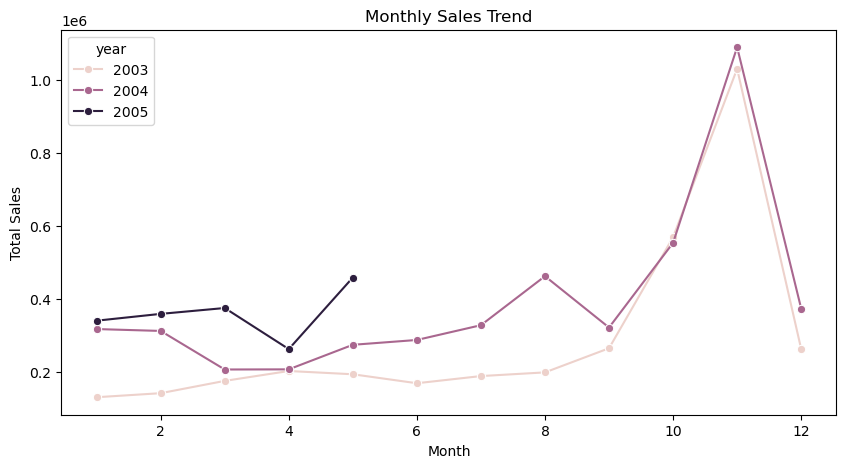

In [10]:
# Monthly Sales Trend

monthly_sales = df.groupby(['year', 'month'])['sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()



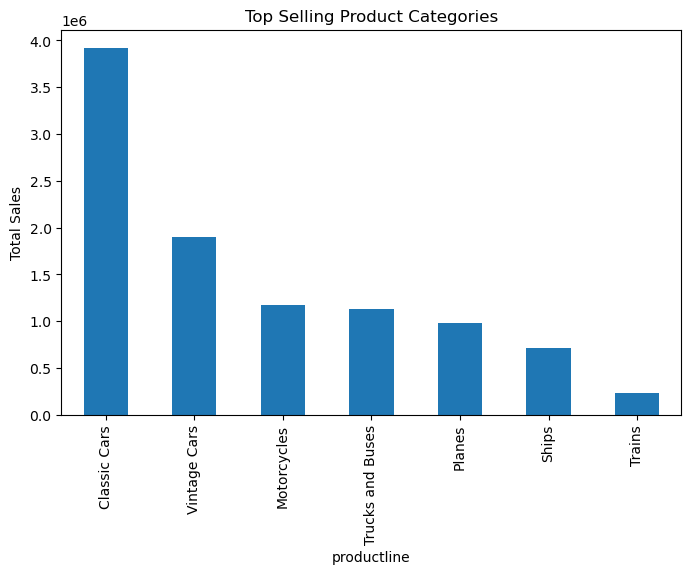

In [12]:
# Top Selling Products

top_products = df.groupby('productline')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
top_products.plot(kind='bar')
plt.title("Top Selling Product Categories")
plt.ylabel("Total Sales")
plt.show()




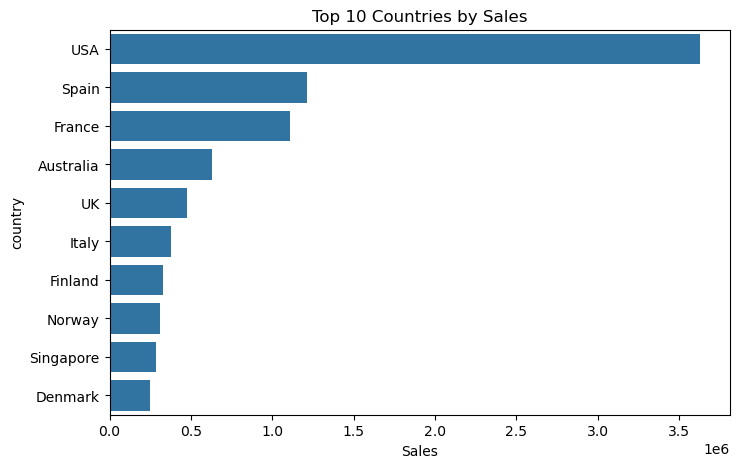

In [14]:
# Sales by Country

top_countries = df.groupby('country')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Sales")
plt.xlabel("Sales")
plt.show()



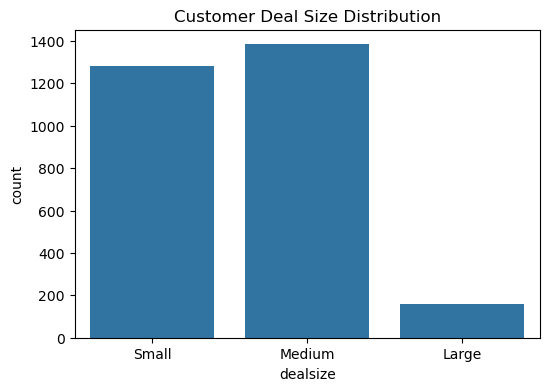

In [22]:
# Customer Insights (Deal Size)

plt.figure(figsize=(6,4))
sns.countplot(x='dealsize', data=df)
plt.title("Customer Deal Size Distribution")
plt.show()

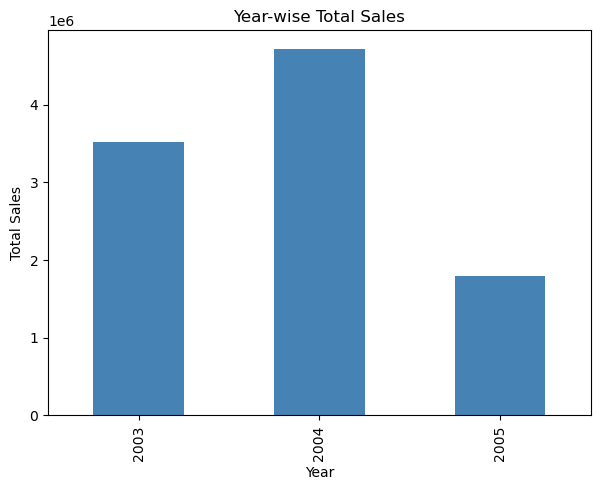

In [24]:
# Year wise sales
yearly_sales = df.groupby('year')['sales'].sum()

plt.figure(figsize=(7,5))
yearly_sales.plot(kind='bar', color='steelblue')
plt.title("Year-wise Total Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


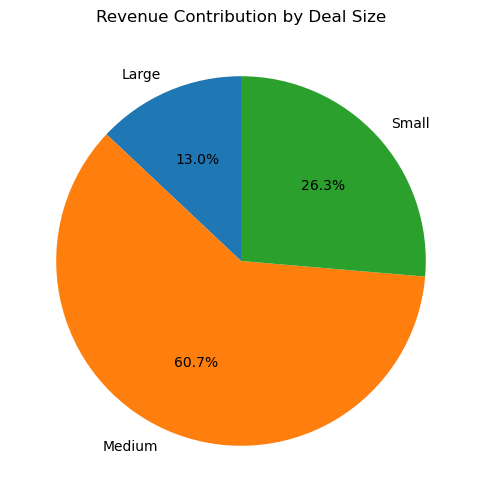

In [26]:
# revenue by deal size
deal_sales = df.groupby('dealsize')['sales'].sum()

plt.figure(figsize=(6,6))
deal_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Revenue Contribution by Deal Size")
plt.ylabel("")
plt.show()


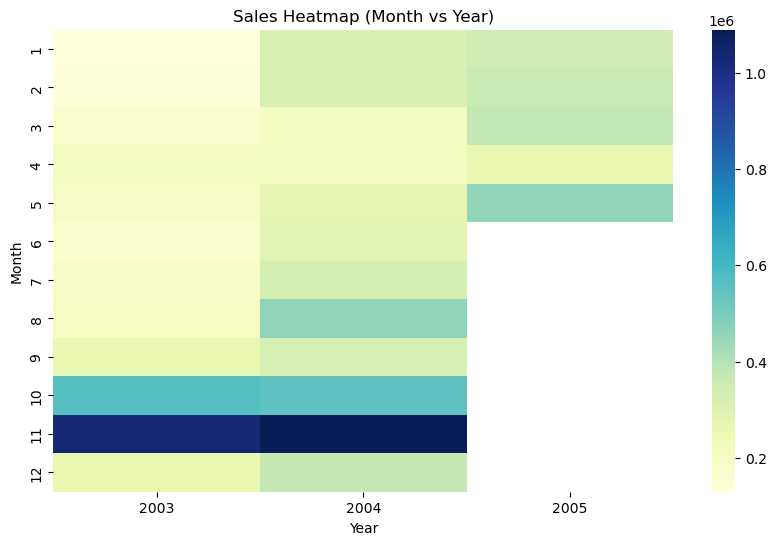

In [28]:
# Heatmap: Sales by Month & Year

pivot_table = df.pivot_table(values='sales', index='month', columns='year', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title("Sales Heatmap (Month vs Year)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()
